# Task 1

Made by Roman Efremov, J41325c

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./bioresponse.csv')
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [4]:
x = df.drop(['Activity'], axis=1)
y = df['Activity']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=13)

In [6]:
small_dtc = DecisionTreeClassifier(max_depth=5, random_state=13)
deep_dtc = DecisionTreeClassifier(max_depth=35, random_state=13)
small_rfc = RandomForestClassifier(max_depth=5, random_state=13)
deep_rfc = RandomForestClassifier(max_depth=35, random_state=13)

In [53]:
clfs = [
    ("Small Decision tree", small_dtc),
    ("Deep Decision tree", deep_dtc),
    ("Small Random forest", small_rfc),
    ("Deep Random forest", deep_rfc)
]

In [55]:
for (name, clf) in clfs:
    print("Metrics of", name, "classifier:")
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    precision = metrics.precision_score(y_test, y_pred)
    print("Precision: ", precision)
    recall = metrics.recall_score(y_test, y_pred)
    print("Recall: ", recall)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy: ", accuracy)
    f1 = metrics.f1_score(y_test, y_pred)
    print("F1: ", f1)
    y_pred_proba = clf.predict_proba(x_test)
    log_loss = metrics.log_loss(y_test, y_pred_proba)
    print("Log-loss: ", log_loss)
    print()

Metrics of Small Decision tree classifier:
Precision:  0.7732558139534884
Recall:  0.7835051546391752
Accuracy:  0.7577937649880095
F1:  0.7783467446964155
Log-loss:  0.7233539372990156

Metrics of Deep Decision tree classifier:
Precision:  0.750354609929078
Recall:  0.7790868924889544
Accuracy:  0.7394084732214229
F1:  0.7644508670520231
Log-loss:  9.000512473813655

Metrics of Small Random forest classifier:
Precision:  0.7579425113464447
Recall:  0.7378497790868925
Accuracy:  0.7298161470823341
F1:  0.7477611940298508
Log-loss:  0.5602228827783927

Metrics of Deep Random forest classifier:
Precision:  0.8040638606676342
Recall:  0.8159057437407953
Accuracy:  0.7921662669864109
F1:  0.8099415204678362
Log-loss:  0.4786743588167104



From these metrics we can see that between decision trees small tree gives better metrics probably because deep tree is overfitted. But for Random Forest it's not a problem and deep Random Forest gives best metrics among all classifiers. 

In [10]:
import matplotlib.pyplot as plt

**Precision-recall curves**

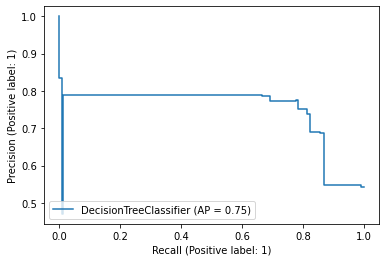

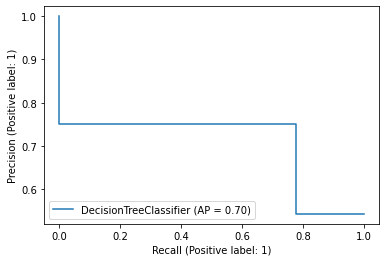

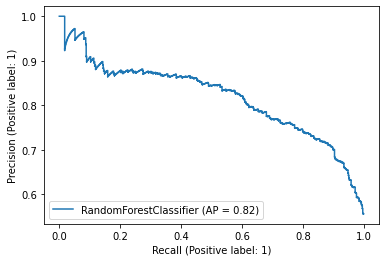

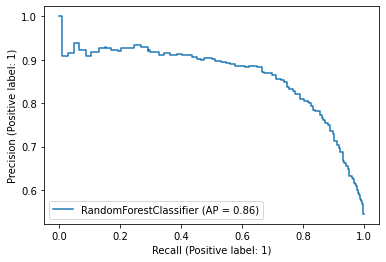

In [58]:
for (name, clf) in clfs:
    metrics.plot_precision_recall_curve(clf, x_test, y_test)

**ROC curves**

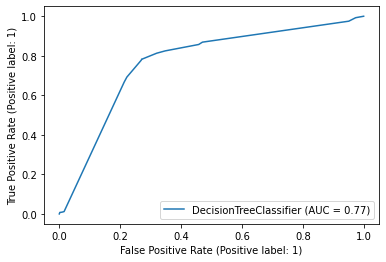

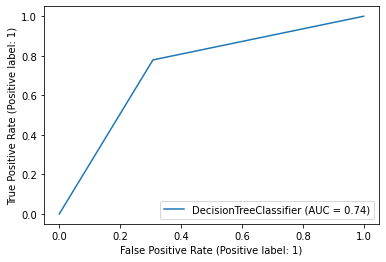

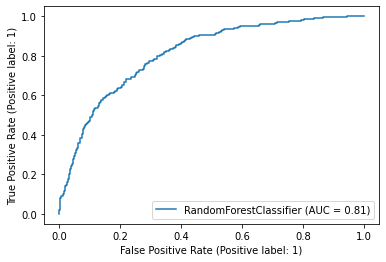

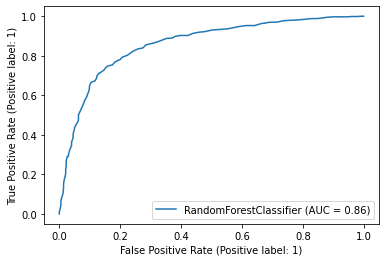

In [11]:
for (name, clf) in clfs:
    metrics.plot_roc_curve(clf, x_test, y_test)

From ROC curves we can see that deep random forest has the maximum AUC among all classifiers.

**Training classifier with zero False Negative errors number**

For avoiding of False Negative (FN) errors we will use predicted probabilities from Random Forest with deep trees and we will pick the best threshold value for it.

In [15]:
clf = clfs[3][1]
clf

RandomForestClassifier(max_depth=35, random_state=13)

In [17]:
y_proba = clf.predict_proba(x_test)

When minimizing False Negative errors, False Positive errors number grows. So let's find probability threshold value with number of FN=0 and with minimum possible number of False Positive.

In [47]:
best_fp = None
best_threshold = None
for threshold in np.arange(0.0, 1.0, 0.005):
    y_pred = [p[0] <= threshold for p in y_proba]
    res = metrics.confusion_matrix(y_test, y_pred).ravel()
    tn, fp, fn, tp = res
    if fn != 0:
        continue
    if best_fp is None or fp < best_fp:
        best_threshold = threshold
        best_fp = fp 
print("Best threshold =", best_threshold, ", FP =", best_fp)

Best threshold = 0.97 , FP = 567


Metrics for classified

In [51]:
y_pred = [p[0] <= best_threshold for p in y_proba]
print("Classifier metrics:")
precision = metrics.precision_score(y_test, y_pred)
print("Precision: ", precision)
recall = metrics.recall_score(y_test, y_pred)
print("Recall: ", recall)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
f1 = metrics.f1_score(y_test, y_pred)
print("F1: ", f1)
log_loss = metrics.log_loss(y_test, y_proba)
print("Log-loss: ", log_loss)

Classifier metrics:
Precision:  0.5449438202247191
Recall:  1.0
Accuracy:  0.5467625899280576
F1:  0.7054545454545454
Log-loss:  0.4786743588167104


As expected, when FN errors reduced, Recall value become equal to 1.0 and other metrics deteriorated. Since threshold value is very close to the 1, almost all negatives were treated as positives. Beacuse of that, we got precision very close to 0.5.